   # Forest Cover Type Classification
   
   - **Armin Norouzi**
   - Part of [Build Deep Learning Models with TensorFlow course project by Codecademy](https://www.codecademy.com/profiles/arminNorouziYengeje3353267212/certificates/5f85c4b9c431a800138a60e0)
   - Compatible with Google Colaboratory- TF version 2.8.0

   
   - **Objective:** Build a deep learning model to predict the forest cover type from different cartographic variables.
   
   
The covertypes are the following:

- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

## Loading neccessary libraries

In [6]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## EDA

In [8]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/CoverType-classification-tf/main/Data/cover_data.csv')


cols = raw_df.columns.tolist()
features, label = cols[:-1], cols[-1]


print(cols)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'class']


In [9]:
raw_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Data Prepration

In [10]:
raw_data = raw_df.values

X, y = raw_data[:, :-1], raw_data[:, -1]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# normalize data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [11]:
X_train = X_train_normalized
X_test = X_test_normalized

## Define some helper functions

In [13]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

## Build model

In [14]:
num_features = len(features)

classifier = keras.Sequential()
classifier.add(layers.Dense(64, input_dim=num_features, activation='relu'))
classifier.add(layers.Dense(32, activation='relu'))
classifier.add(layers.Dense(8, activation='softmax'))
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
print("Summary report of Keras classifier:")
classifier.summary()

Summary report of Keras classifier:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3520      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________


## Training the model

Epoch 1/100
409/409 [==============================] - 2s 4ms/step - loss: 0.5717 - accuracy: 0.7569 - val_loss: 0.5531 - val_accuracy: 0.7632
Epoch 2/100
409/409 [==============================] - 2s 4ms/step - loss: 0.5375 - accuracy: 0.7706 - val_loss: 0.5257 - val_accuracy: 0.7736
Epoch 3/100
409/409 [==============================] - 2s 4ms/step - loss: 0.5132 - accuracy: 0.7795 - val_loss: 0.5026 - val_accuracy: 0.7851
Epoch 4/100
409/409 [==============================] - 2s 6ms/step - loss: 0.4929 - accuracy: 0.7887 - val_loss: 0.4853 - val_accuracy: 0.7904
Epoch 5/100
409/409 [==============================] - 2s 6ms/step - loss: 0.4759 - accuracy: 0.7966 - val_loss: 0.4686 - val_accuracy: 0.8016
Epoch 6/100
409/409 [==============================] - 3s 7ms/step - loss: 0.4622 - accuracy: 0.8033 - val_loss: 0.4576 - val_accuracy: 0.8044
Epoch 7/100
409/409 [==============================] - 3s 8ms/step - loss: 0.4509 - accuracy: 0.8092 - val_loss: 0.4444 - val_accuracy: 0.8129

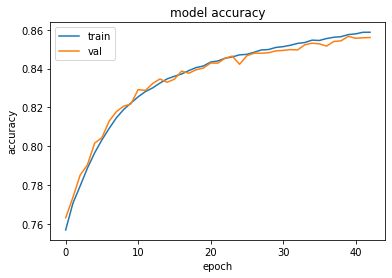

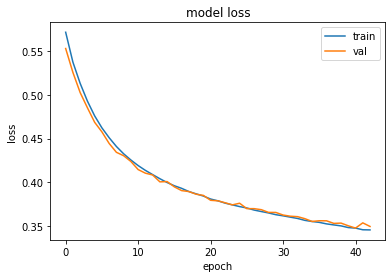

Test loss: 0.353122740983963
Test accuracy: 0.8557438254356384
                   precision    recall  f1-score   support

       Spruce/Fir       0.88      0.83      0.85     42368
   Lodgepole Pine       0.85      0.91      0.88     56661
   Ponderosa Pine       0.81      0.87      0.84      7151
Cottonwood/Willow       0.81      0.65      0.72       549
            Aspen       0.82      0.38      0.52      1899
      Douglas-fir       0.72      0.59      0.65      3473
        Krummholz       0.88      0.86      0.87      4102

         accuracy                           0.86    116203
        macro avg       0.82      0.73      0.76    116203
     weighted avg       0.86      0.86      0.85    116203



FileNotFoundError: ignored

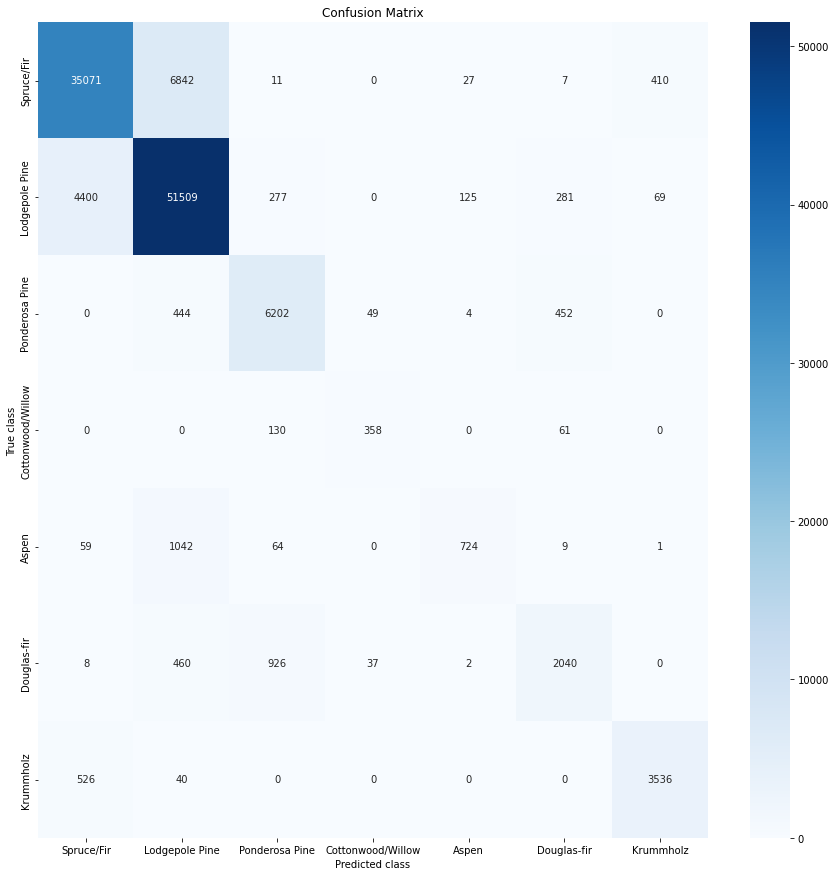

In [18]:
num_epochs = 100
batch_size = 1024

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
history = classifier.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    callbacks=[earlystop_callback],
                    validation_split=0.1,
                    verbose=1)

plot_history(history, 'acc')
plot_history(history, 'loss')

score = classifier.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

y_pred = classifier.predict(X_test)


In [22]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, 
                 y_pred=y_pred)

array([[35071,  6842,    11,     0,    27,     7,   410],
       [ 4400, 51509,   277,     0,   125,   281,    69],
       [    0,   444,  6202,    49,     4,   452,     0],
       [    0,     0,   130,   358,     0,    61,     0],
       [   59,  1042,    64,     0,   724,     9,     1],
       [    8,   460,   926,    37,     2,  2040,     0],
       [  526,    40,     0,     0,     0,     0,  3536]])

In [25]:
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

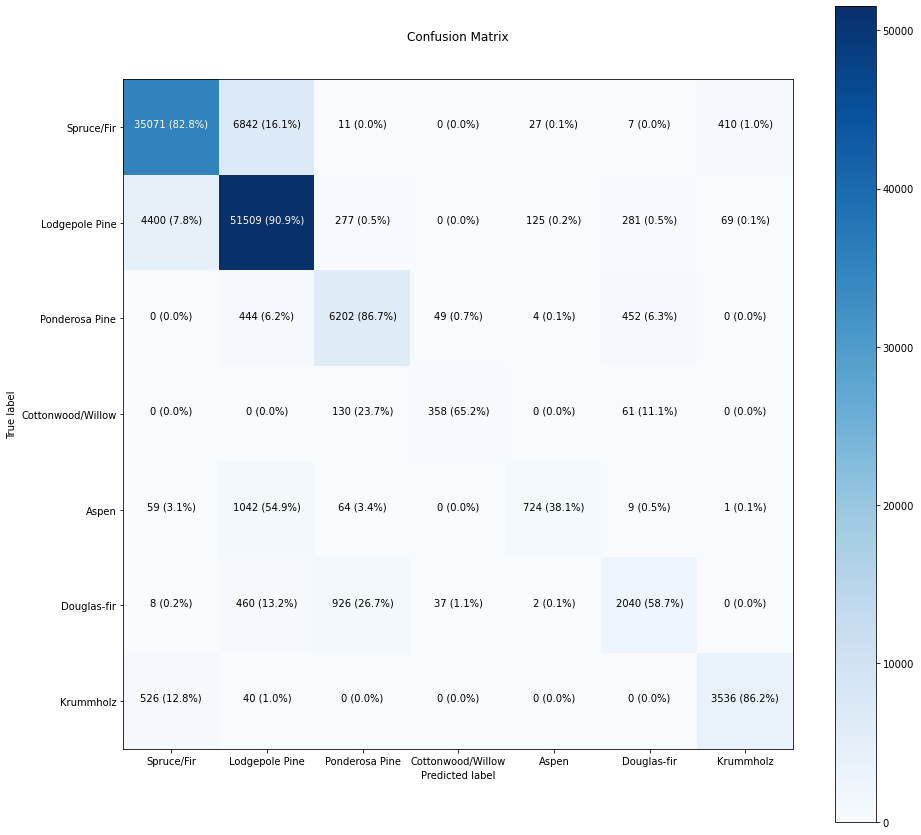

In [26]:
  class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']

# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## Conclusions: 
The numbers along the diagonal of the heatmap show how many were correctly classified. All other numbers on either sides of the diagonal show mis-classifications. We see that Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir suffer from a high percentage of mis-classifications.